In [1]:
import pandas as pd

In [8]:
df=pd.read_csv("EastWestAirlines.csv")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [20]:
X = df.iloc[:, 3:]

In [13]:
# Handle missing values (replace with mean for numerical features)
df.fillna(df.mean(), inplace=True)

# Remove outliers (example using IQR for 'Balance' feature)
Q1 = df['Balance'].quantile(0.25)
Q3 = df['Balance'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Balance'] < (Q1 - 1.5 * IQR)) | (df['Balance'] > (Q3 + 1.5 * IQR)))]

# Scale features (example using MinMaxScaler)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll']] = scaler.fit_transform(df[['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll']])


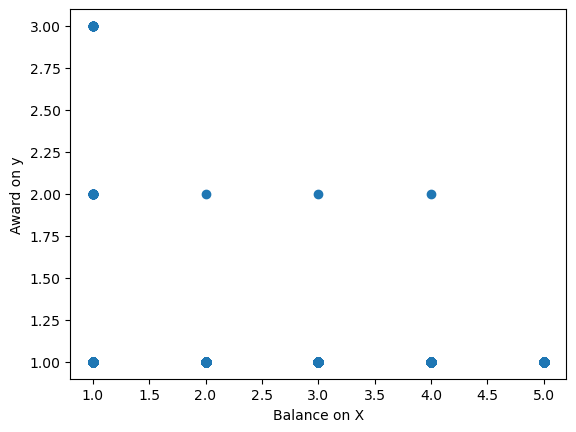

In [14]:
import matplotlib.pyplot as plt
plt.scatter(x=X.iloc[:,0], y=X.iloc[:,1])
plt.xlabel("Balance on X")
plt.ylabel("Award on y")
plt.show()

0.4577835304778383

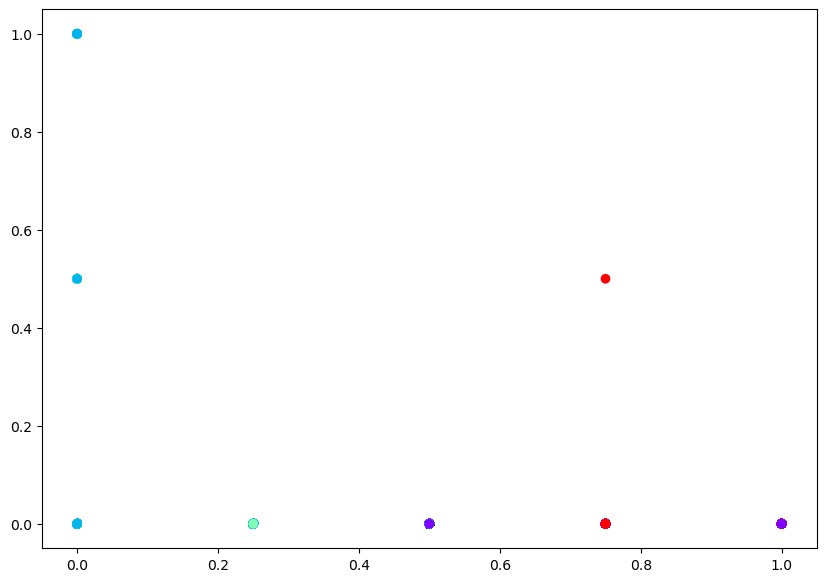

In [22]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5,linkage='complete')
df["Agg"] = cluster.fit_predict(X)
Y = df["Agg"]

plt.figure(figsize=(10, 7))  
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=cluster.labels_, cmap='rainbow')  

from sklearn.metrics import silhouette_score
silhouette_score(X,Y) 

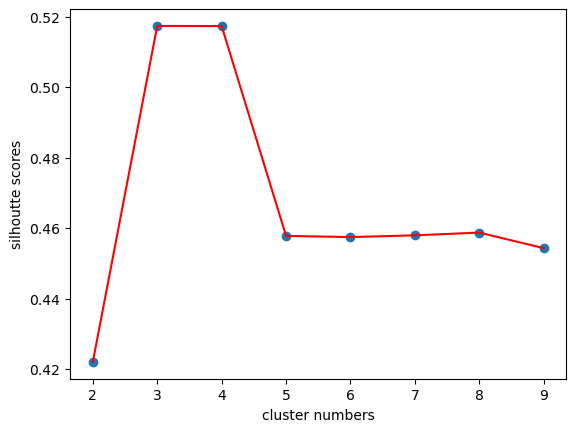

In [32]:
scores = []

for i in range(2,10):
    cluster = AgglomerativeClustering(n_clusters=i,linkage='complete')
    df["Agg"] = cluster.fit_predict(X)
    Y = df["Agg"]
    scores.append(silhouette_score(X,Y))
    
    
import matplotlib.pyplot as plt
plt.scatter(range(2,10),scores)
plt.plot(range(2,10),scores,color='red')
plt.xlabel("cluster numbers")   
plt.ylabel("silhoutte scores")
plt.show()

In [33]:
X = df.iloc[:, 2:]

In [34]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(X)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6,n_init=20)

df["kmeans"] = kmeans.fit_predict(SS_X)
df["kmeans"].value_counts()

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(


kmeans
0    2341
5     660
2     381
1     127
3      39
4      13
Name: count, dtype: int64

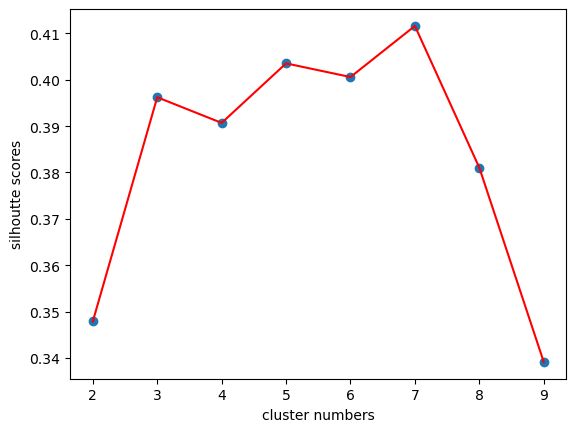

In [37]:
from sklearn.metrics import silhouette_score

scores = []

for i in range(2,10):
    cluster = KMeans(n_clusters=i,n_init=20)
    df["kmeans"] = cluster.fit_predict(SS_X)
    Y = df["kmeans"]
    scores.append(silhouette_score(SS_X,Y))
    
    
import matplotlib.pyplot as plt
plt.scatter(range(2,10),scores)
plt.plot(range(2,10),scores,color='red')
plt.xlabel("cluster numbers")   
plt.ylabel("silhoutte scores")
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.75,min_samples=3)

dbscan.fit(SS_X)
dbscan.labels_
df['dbscan']  = dbscan.labels_
df['dbscan'].value_counts()

df_final = df[df['dbscan'] != -1]
df_final.shape